<a href="https://colab.research.google.com/github/Rajasri1011-v/task4/blob/main/sri3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task4


In [1]:
import pandas as pd

try:
    df = pd.read_csv('data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'data.csv' not found. Please ensure the file exists in the current directory.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'data.csv'. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


(569, 33)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

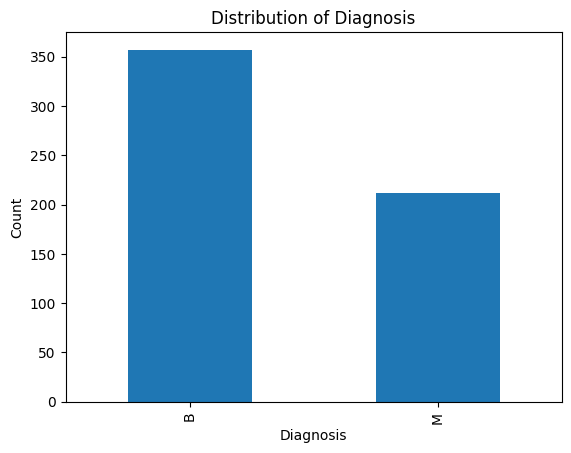

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

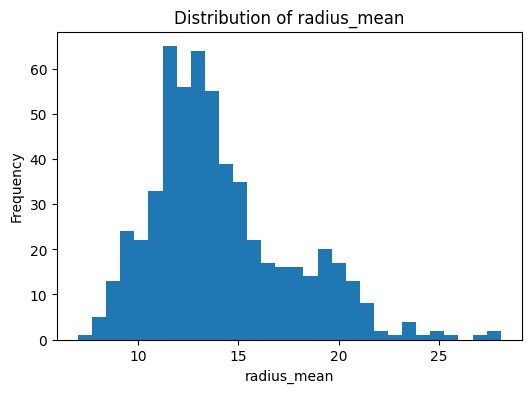

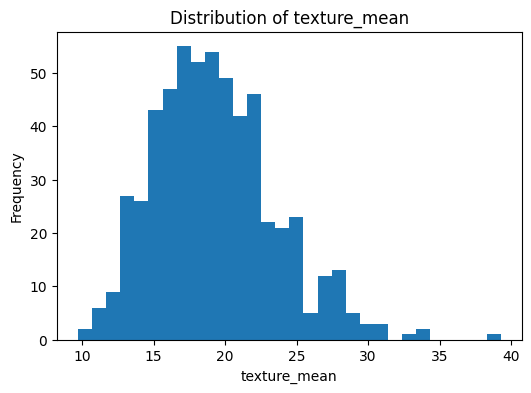

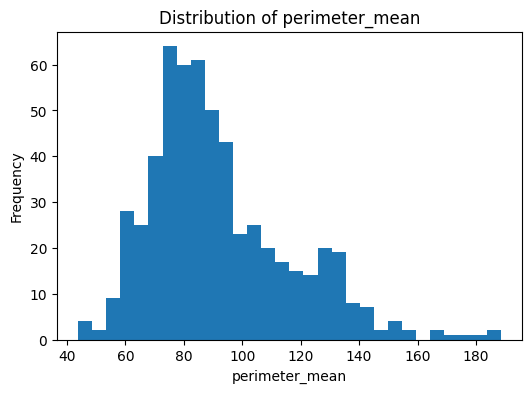

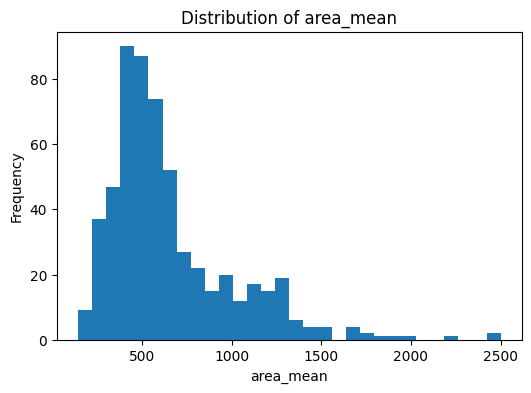

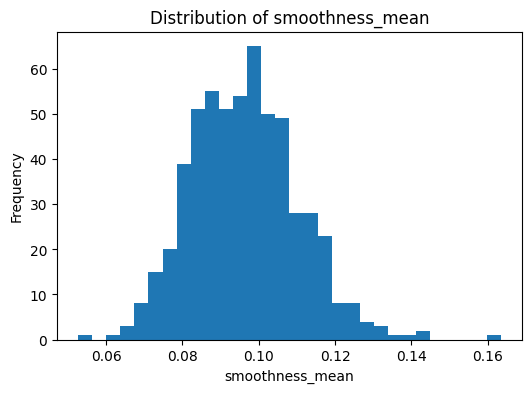

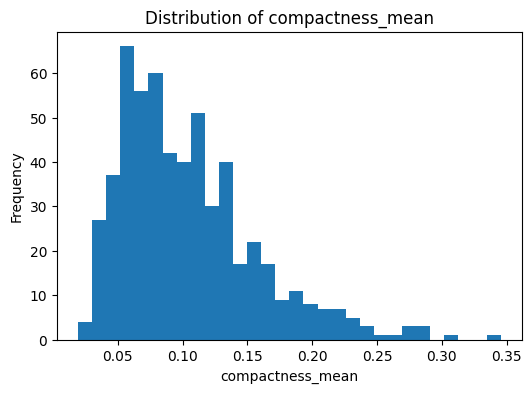

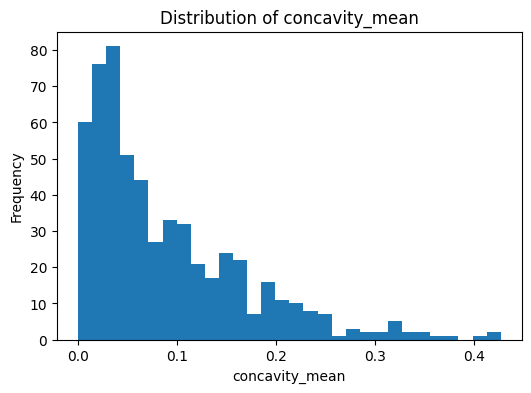

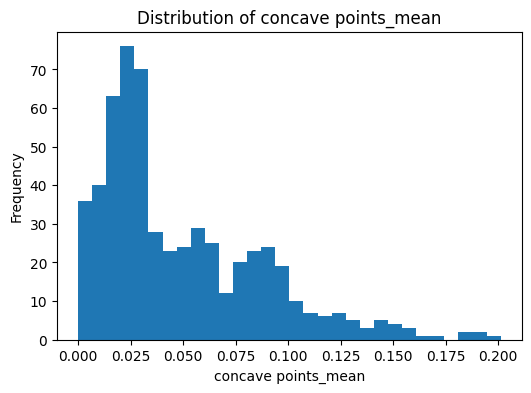

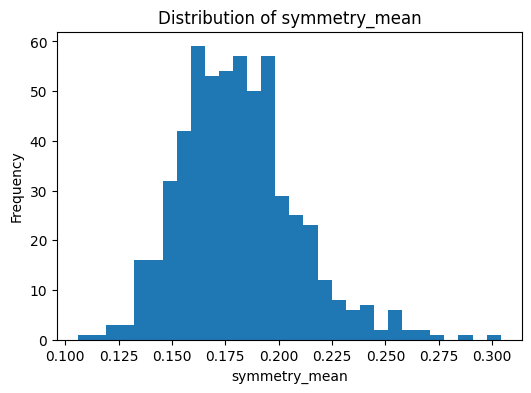

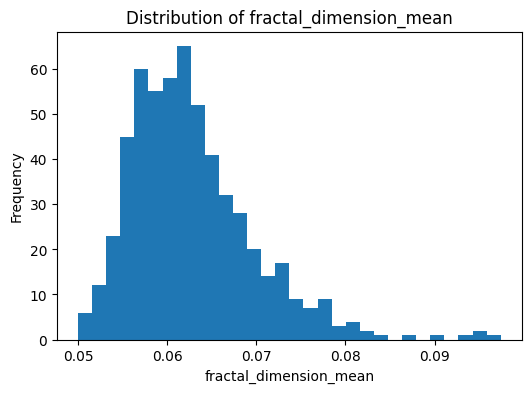

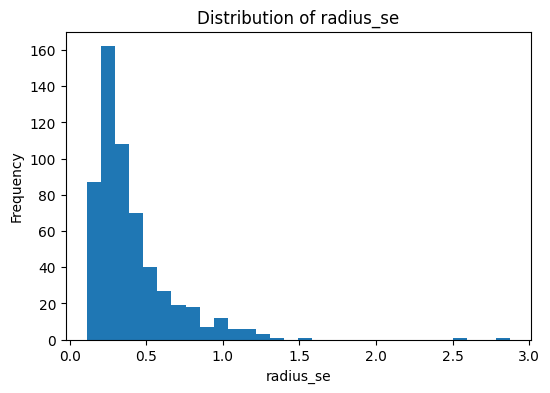

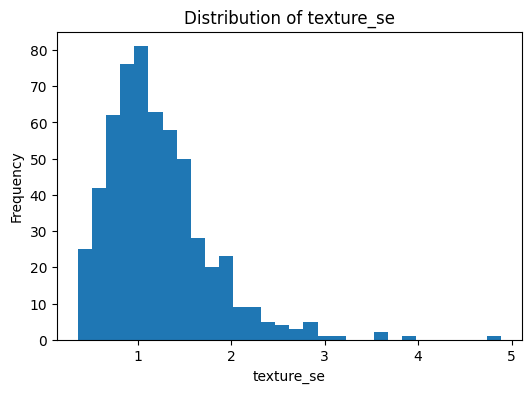

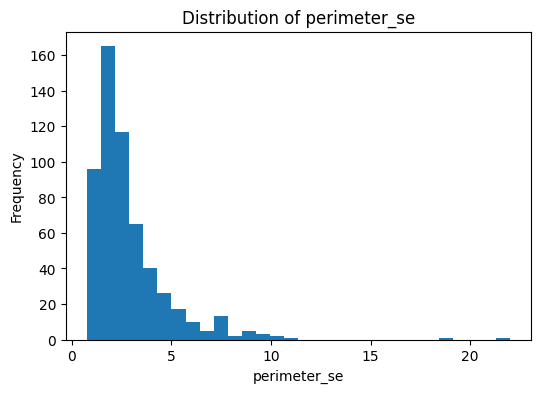

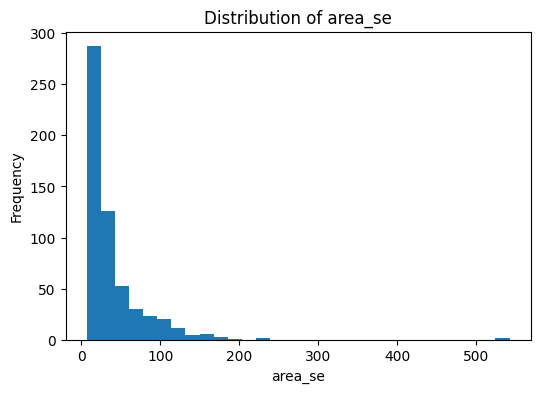

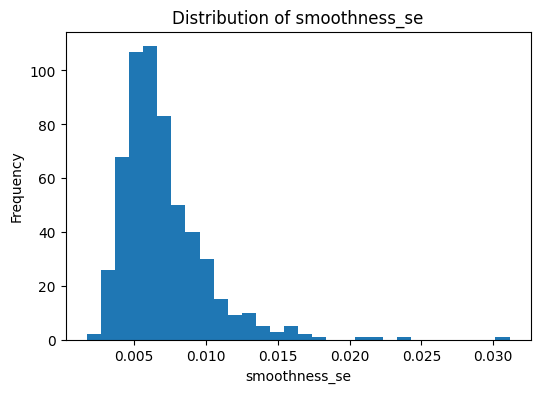

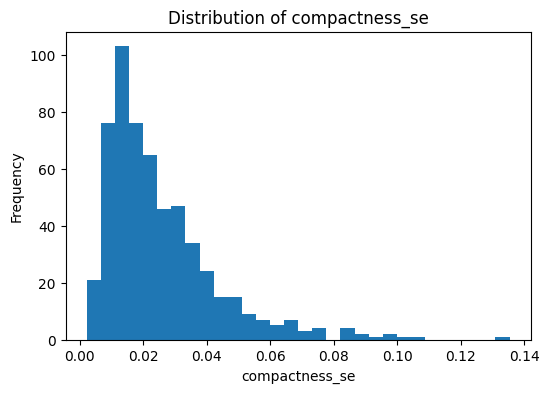

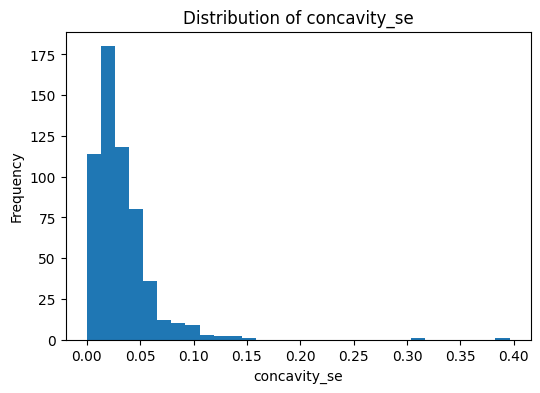

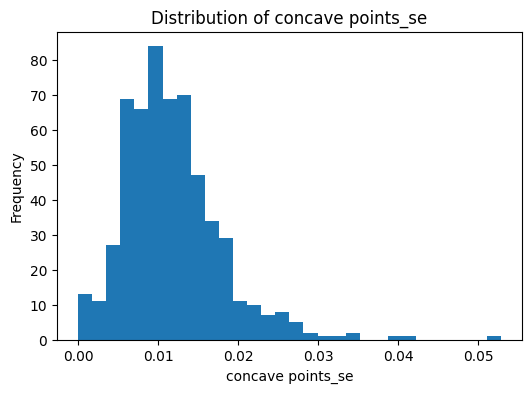

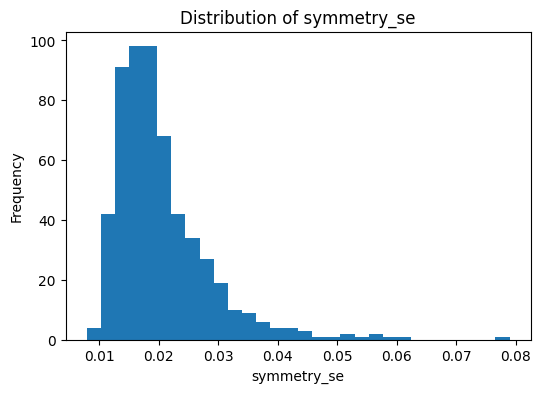

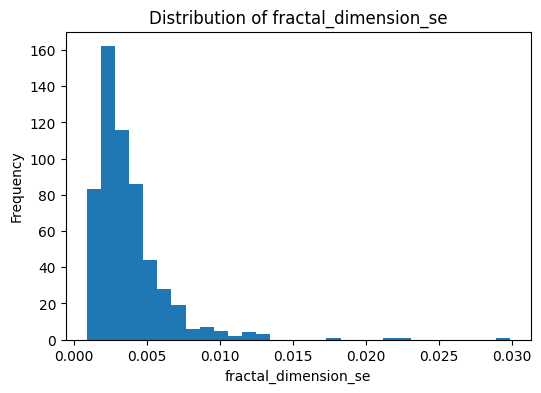

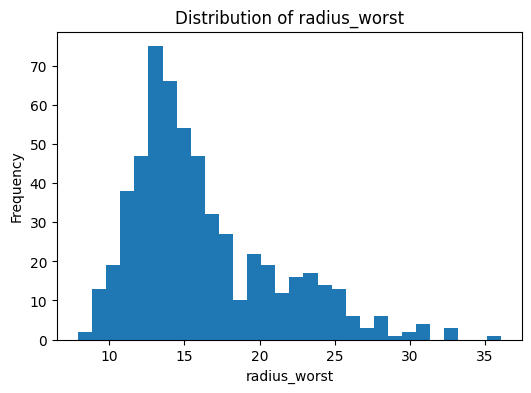

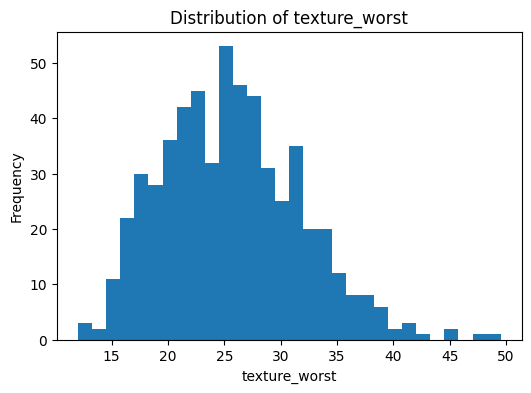

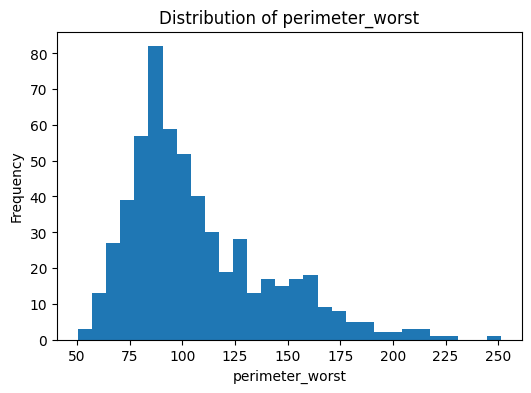

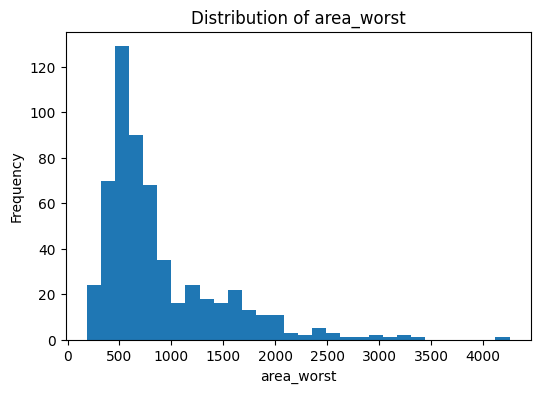

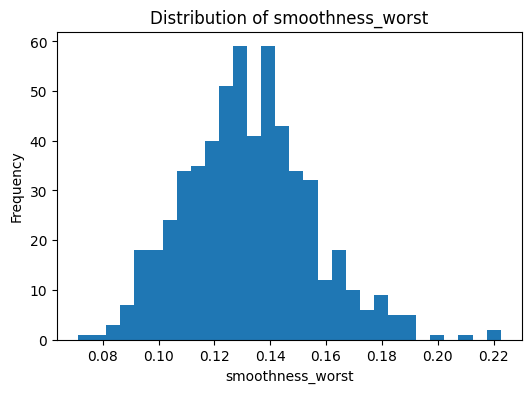

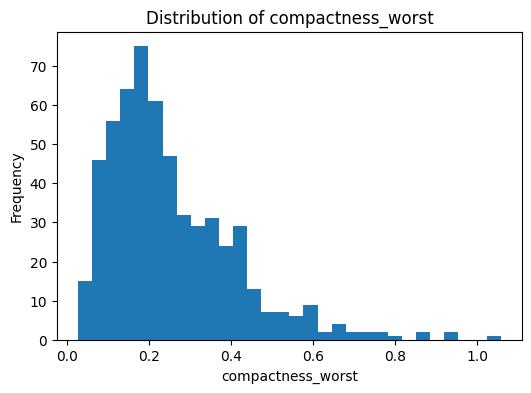

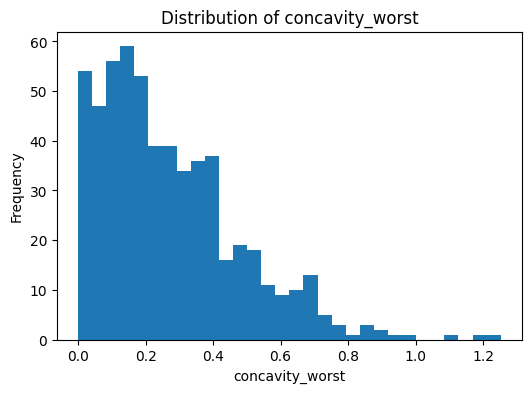

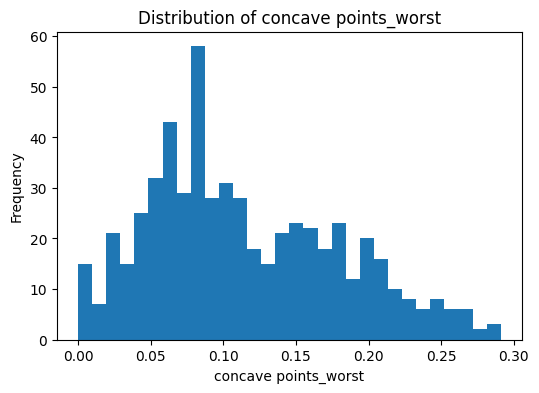

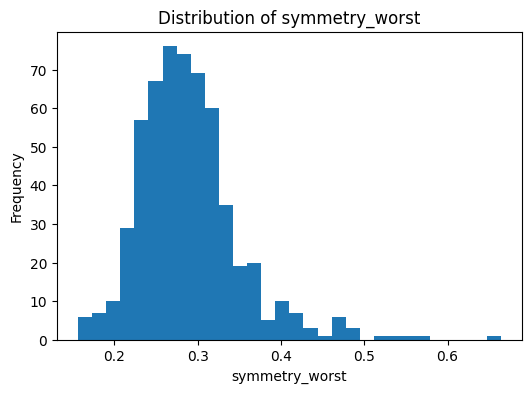

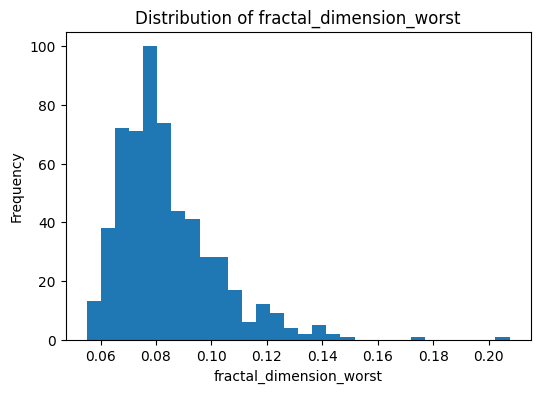

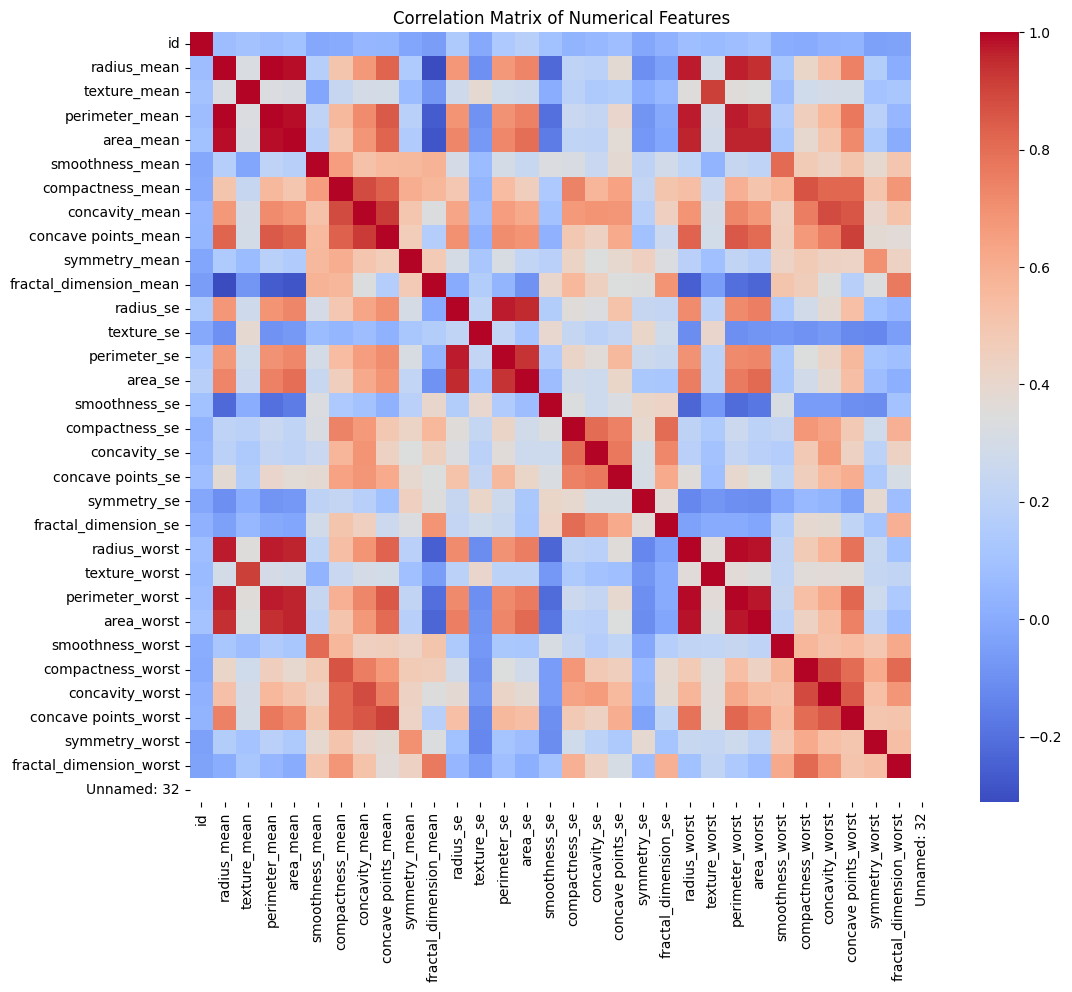

[nan]
'Unnamed: 32' column dropped successfully.


In [2]:
# Examine data types and summary statistics
print(df.info())
print(df.describe())

# Analyze the target variable
print(df['diagnosis'].value_counts())
import matplotlib.pyplot as plt
df['diagnosis'].value_counts().plot(kind='bar')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Check for missing values
print(df.isnull().sum())

# Explore data distributions (histograms for numerical features)
numerical_features = df.select_dtypes(include=['number'])
for col in numerical_features.columns:
    if col != 'id' and col != 'Unnamed: 32':  # Exclude non-relevant columns
        plt.figure(figsize=(6, 4))
        plt.hist(df[col], bins=30)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
        plt.show()

# Correlation analysis
correlation_matrix = numerical_features.corr()
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Address the 'Unnamed: 32' column
print(df['Unnamed: 32'].unique()) # Check unique values in 'Unnamed: 32'
if df['Unnamed: 32'].isnull().all():
    df = df.drop('Unnamed: 32', axis=1)
    print("'Unnamed: 32' column dropped successfully.")


In [3]:
# 1. Impute missing values (already checked in previous steps, but just in case)
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# 2. Handle outliers using IQR method
numerical_features = df.select_dtypes(include=['number'])
for col in numerical_features.columns:
    if col not in ['id']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# 3. Verify data types and convert 'diagnosis'
# Convert diagnosis to numerical (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Check for other columns with incorrect types (if any)
for col in df.columns:
    if df[col].dtype == 'object' and col != 'diagnosis':
        try:
            df[col] = pd.to_numeric(df[col])  # Try converting to numeric first
        except ValueError:
            df[col] = df[col].astype('category') # If not numeric, convert to category

display(df.head())
print(df.info())


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,84358402,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# First split: 70% train, 30% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: 50/50 of temp data for validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Display shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (398, 31)
y_train shape: (398,)
X_val shape: (85, 31)
y_val shape: (85,)
X_test shape: (86, 31)
y_test shape: (86,)


In [5]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features
numerical_features = X_train.select_dtypes(include=['number']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train[numerical_features])

# Transform training, validation, and test sets
X_train_scaled = X_train.copy()
X_train_scaled[numerical_features] = scaler.transform(X_train[numerical_features])

X_val_scaled = X_val.copy()
X_val_scaled[numerical_features] = scaler.transform(X_val[numerical_features])

X_test_scaled = X_test.copy()
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

display(X_train_scaled.head())
display(X_val_scaled.head())
display(X_test_scaled.head())

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,-0.191838,1.830835,1.094745,2.267375,1.997116,2.364048,2.593918,2.642544,2.817882,2.524378,...,1.559841,0.972540,1.980520,1.624940,1.380748,2.566014,2.507109,2.049399,2.425740,1.031176
330,-0.249409,0.590387,-0.930103,0.623164,0.508670,-0.058064,0.729929,0.459473,0.591302,-0.107329,...,0.556138,-0.651391,0.545186,0.459474,0.498808,1.390705,1.135137,1.255850,0.257114,0.503264
378,-0.188832,-0.118013,-1.016267,-0.137337,-0.191737,-0.937329,-0.525087,-0.590358,-0.618264,-0.068741,...,-0.362653,-1.041535,-0.276698,-0.410937,-0.192910,0.432890,-0.066659,-0.140014,0.937757,0.826296
213,6.319678,1.005862,1.475302,1.000595,1.018655,0.351013,0.271671,1.103574,0.473786,-1.936404,...,0.405909,0.363982,0.423495,0.356205,-0.331253,-0.481007,0.051154,-0.072253,-2.361883,-0.945979
89,-0.249672,0.174912,-0.994726,0.188034,0.043159,1.256879,0.664754,0.180003,0.597389,1.181513,...,0.029248,-1.274954,0.080263,-0.101973,-0.184263,0.422433,-0.049038,0.376471,0.501258,0.094133


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
130,-0.249634,-0.557400,-1.461446,-0.536026,-0.602888,0.782378,-0.125690,-0.778198,-0.509483,0.270834,...,-0.623921,-1.346647,-0.482013,-0.646559,0.464222,0.071095,-0.860892,-0.494325,1.089422,0.576795
267,-0.189602,-0.138936,0.584943,-0.185492,-0.256309,-1.161639,-0.380278,-0.614208,-0.705342,-0.674574,...,-0.306045,0.692437,-0.286059,-0.401453,-1.360183,-0.524925,-0.628538,-0.795181,-0.802692,-0.816515
385,-0.255429,0.162956,0.931991,0.109945,0.085329,-0.639688,-0.710835,-0.032361,0.122826,-0.705444,...,-0.090499,0.970872,-0.144398,-0.197655,-0.032950,-0.628792,-0.013291,0.319251,-0.745355,-0.934667
83,-0.191831,1.508019,1.650023,1.633985,1.624840,1.853600,1.585344,1.447184,2.615802,-0.678433,...,0.897963,1.139268,1.075636,0.939992,0.312909,0.232822,-0.135636,1.045040,-1.052384,0.552913
399,-0.249353,-0.673972,-0.511252,-0.701748,-0.681626,-0.348517,-0.793117,-0.778467,-0.838739,0.143493,...,-0.599971,-0.232904,-0.649885,-0.611153,-0.326930,-0.527713,-0.630552,-0.920613,-0.186784,-0.127088


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
162,-0.249601,1.654482,-0.298236,1.703397,1.894987,1.170606,1.330756,2.216602,2.131447,0.838079,...,2.291391,0.083879,2.124053,2.286811,0.511778,0.950138,2.068581,1.656389,1.411248,0.565482
60,-0.249692,-1.161184,-1.080890,-1.166379,-1.076964,1.271258,-0.420605,-1.016839,-0.930846,2.524378,...,-1.129039,-1.406669,-1.153500,-1.018750,-0.192910,-1.043148,-1.250935,-1.338770,1.252185,-0.190563
269,-0.189600,-0.999776,0.237894,-0.951634,-0.968246,0.897408,0.562919,-0.024546,-0.513453,-0.547233,...,-0.983164,-0.112860,-0.946000,-0.930655,0.066484,0.046697,-0.084281,-0.432136,-0.508610,0.237423
349,-0.249392,-0.629137,-1.061742,-0.616284,-0.698758,1.443804,0.393873,-1.005115,-0.799302,2.505084,...,-0.739314,-1.361653,-0.740685,-0.749829,-0.115091,-0.416874,-1.202904,-1.009454,0.451319,-0.460803
216,-0.190340,-0.647071,-0.250367,-0.612380,-0.680638,-0.150089,0.287964,-0.268711,-0.440667,0.606550,...,-0.643516,0.202256,-0.643644,-0.676065,0.369111,0.392458,0.052664,-0.013528,0.956253,0.026258


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize the models with default parameters and random_state for reproducibility
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

# Train the models on the scaled training data
logreg_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the parameter grids for each model
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV for each model
grid_search_logreg = GridSearchCV(LogisticRegression(random_state=42), param_grid_logreg, scoring='accuracy', cv=5)
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, scoring='accuracy', cv=5)
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, scoring='accuracy', cv=5)

# Fit the GridSearchCV objects to the validation data
grid_search_logreg.fit(X_val_scaled, y_val)
grid_search_rf.fit(X_val_scaled, y_val)
grid_search_svm.fit(X_val_scaled, y_val)

# Extract the best estimators
best_logreg = grid_search_logreg.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_svm = grid_search_svm.best_estimator_

# Print the best hyperparameters and best score for each model (Optional)
print("Best Logistic Regression:", grid_search_logreg.best_params_, grid_search_logreg.best_score_)
print("Best Random Forest:", grid_search_rf.best_params_, grid_search_rf.best_score_)
print("Best SVM:", grid_search_svm.best_params_, grid_search_svm.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Logistic Regression: {'C': 0.1, 'solver': 'liblinear'} 0.9882352941176471
Best Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 0.9294117647058823
Best SVM: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'} 0.9882352941176471


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predict on the test set using the best models
y_pred_logreg = best_logreg.predict(X_test_scaled)
y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_svm = best_svm.predict(X_test_scaled)

# Calculate evaluation metrics for each model
def evaluate_model(y_true, y_pred, model_name):
    try:
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        auc_roc = roc_auc_score(y_true, y_pred)
        print(f"Metrics for {model_name}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1:.4f}")
        print(f"AUC-ROC: {auc_roc:.4f}")
    except ValueError as e:
        print(f"Error calculating metrics for {model_name}: {e}")

evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

Metrics for Logistic Regression:
Accuracy: 0.9884
Precision: 1.0000
Recall: 0.9688
F1-score: 0.9841
AUC-ROC: 0.9844
Metrics for Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
AUC-ROC: 1.0000
Metrics for Support Vector Machine:
Accuracy: 0.9884
Precision: 0.9697
Recall: 1.0000
F1-score: 0.9846
AUC-ROC: 0.9907


In [2]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['diagnosis'])

print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)

Shape of df_train: (455, 33)
Shape of df_test: (114, 33)


In [3]:
numerical_features = df_train.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove('id')
numerical_features.remove('Unnamed: 32')
# 'diagnosis' is likely categorical, so we exclude it as well.
# However, we might need to revisit this if we are using a model
# that can handle categorical targets directly.
if 'diagnosis' in numerical_features:
    numerical_features.remove('diagnosis')

print(numerical_features)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [4]:
from sklearn.preprocessing import StandardScaler

numerical_features = df_train.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove('id')
numerical_features.remove('Unnamed: 32')
if 'diagnosis' in numerical_features:
    numerical_features.remove('diagnosis')

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(df_train[numerical_features])

# Transform training and testing data
df_train[numerical_features] = scaler.transform(df_train[numerical_features])
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

# Verify standardization (optional)
print(df_train[numerical_features].mean())
print(df_train[numerical_features].std())

radius_mean               -1.737316e-16
texture_mean               3.904081e-16
perimeter_mean             4.704418e-16
area_mean                 -1.171224e-16
smoothness_mean            7.242070e-16
compactness_mean          -5.075305e-17
concavity_mean            -4.489693e-17
concave points_mean        2.928061e-17
symmetry_mean              2.342449e-17
fractal_dimension_mean     3.669836e-16
radius_se                  1.678755e-16
texture_se                -8.979386e-17
perimeter_se              -2.498612e-16
area_se                    1.444510e-16
smoothness_se             -1.561632e-16
compactness_se            -1.561632e-17
concavity_se               4.684897e-17
concave points_se         -1.405469e-16
symmetry_se                8.588978e-17
fractal_dimension_se      -2.342449e-17
radius_worst              -3.962642e-16
texture_worst              2.186285e-16
perimeter_worst           -2.986622e-16
area_worst                -1.561632e-17
smoothness_worst          -1.522592e-16


In [1]:
import pandas as pd

try:
    df = pd.read_csv('data.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'data.csv' not found.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'data.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: 'data.csv' parsing error.")
    df = None

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


(569, 33)


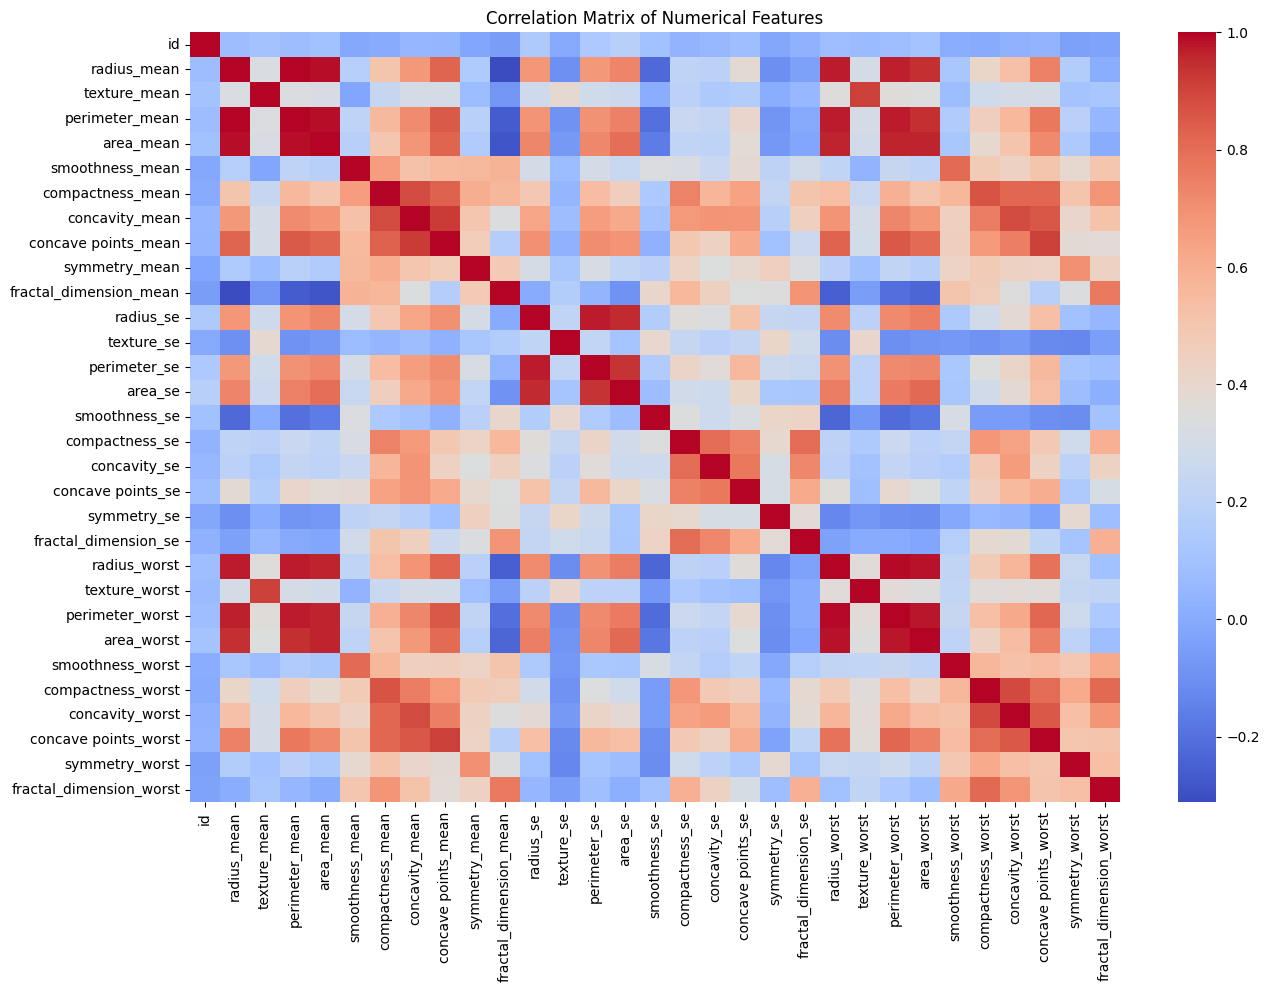

Initial Observations Summary:
1. Missing Values: The 'Unnamed: 32' column contains only missing values and has been removed.
2. Data Types: The 'diagnosis' column is of object type, likely categorical.  It was excluded from the correlation analysis.
3. Potential Outliers: Histograms and boxplots (for 'radius_mean' as an example) should be examined for all numerical features to identify potential outliers.
4. Correlation Analysis: The correlation matrix provides insight into relationships between numerical features.  High correlations may indicate redundancy and need for feature engineering or selection. Examine the heatmap.
5. Diagnosis Distribution: diagnosis
B    357
M    212
Name: count, dtype: int64


In [3]:
# Exclude non-numeric columns from correlation
numeric_df = df.select_dtypes(include=['number'])

# Drop the 'Unnamed: 32' column as it's entirely NaN
numeric_df = numeric_df.drop('Unnamed: 32', axis=1)

# Recalculate the correlation matrix with numeric columns
correlation_matrix = numeric_df.corr()

# Visualize the updated correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Summarize observations
print("Initial Observations Summary:")
print("1. Missing Values: The 'Unnamed: 32' column contains only missing values and has been removed.")
print("2. Data Types: The 'diagnosis' column is of object type, likely categorical.  It was excluded from the correlation analysis.")
print("3. Potential Outliers: Histograms and boxplots (for 'radius_mean' as an example) should be examined for all numerical features to identify potential outliers.")
print("4. Correlation Analysis: The correlation matrix provides insight into relationships between numerical features.  High correlations may indicate redundancy and need for feature engineering or selection. Examine the heatmap.")
print("5. Diagnosis Distribution:", df['diagnosis'].value_counts())

In [4]:
import numpy as np

# Outlier handling using IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

for col in numeric_df.columns:
    if col != 'id':
        numeric_df = handle_outliers_iqr(numeric_df, col)

# Data type correction
numeric_df['id'] = numeric_df['id'].astype(int)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Ensure 'diagnosis' column is in numeric_df
numeric_df['diagnosis'] = df['diagnosis']

# Document changes
print("Outliers handled using IQR method. 'diagnosis' column converted to numerical representation.")

# Display first few rows of the modified DataFrame
display(numeric_df.head())

Outliers handled using IQR method. 'diagnosis' column converted to numerical representation.


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301,1
4,84358402,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678,1


In [5]:
from sklearn.preprocessing import StandardScaler

# One-hot encode the 'diagnosis' column (already numerical in numeric_df)
# No other categorical features are present in the provided dataframes.

# Scale numerical features
scaler = StandardScaler()
features_to_scale = numeric_df.drop(['id', 'diagnosis'], axis=1).columns
numeric_df[features_to_scale] = scaler.fit_transform(numeric_df[features_to_scale])

display(numeric_df.head())

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,1.176800,-2.121200,1.357375,1.184085,1.618861,2.541404,2.647422,2.620973,2.348535,...,-1.375159,2.439568,2.287627,1.344848,2.641905,2.246192,2.296076,2.443918,2.225247,1
1,842517,1.949929,-0.354875,1.795991,2.249396,-0.842995,-0.498189,-0.000497,0.574944,0.017882,...,-0.370048,1.631542,2.287627,-0.377098,-0.443388,-0.137634,1.087084,-0.234408,0.355314,1
2,84300903,1.686226,0.476899,1.670052,1.846217,0.975239,1.148680,1.496076,2.110330,1.004666,...,-0.019582,1.434234,1.807751,0.546654,1.223448,0.920718,1.955000,1.369057,0.265197,1
3,84348301,-0.791983,0.268955,-0.606410,-0.831485,2.737521,2.541404,2.091997,1.506601,2.521318,...,0.140773,-0.245395,-0.593838,2.595949,2.641905,2.119474,2.175786,2.443918,2.482456,1
4,84358402,1.866023,-1.174698,1.891531,2.154338,0.295047,0.599453,1.504202,1.482665,0.006363,...,-1.484267,1.424838,1.525780,0.232758,-0.314469,0.665254,0.729259,-0.951602,-0.410683,1


In [6]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = numeric_df.drop('diagnosis', axis=1)
y = numeric_df['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Accuracy: 0.9298
Precision: 0.9048
Recall: 0.9048
F1-score: 0.9048
AUC-ROC: 0.9246


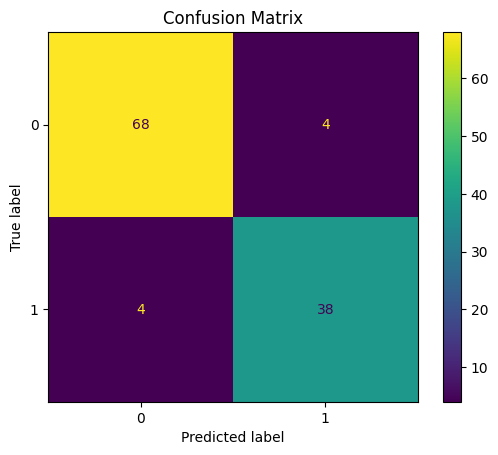


Initial Interpretation:
The model shows good performance based on the provided metrics.
An accuracy of 0.9298 suggests the model correctly classified a significant proportion of instances.
The precision of 0.9048 indicates a relatively low rate of false positives.
The recall of 0.9048 indicates a relatively low rate of false negatives.
The F1-score of 0.9048 provides a balanced measure of precision and recall.
AUC-ROC of 0.9246 indicates the model's ability to distinguish between classes.
The confusion matrix visualization helps to further understand the model's classification performance.
Further analysis and potential hyperparameter tuning could improve the model.


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# Initial interpretation
print("\nInitial Interpretation:")
print("The model shows good performance based on the provided metrics.")
print(f"An accuracy of {accuracy:.4f} suggests the model correctly classified a significant proportion of instances.")
print(f"The precision of {precision:.4f} indicates a relatively low rate of false positives.")
print(f"The recall of {recall:.4f} indicates a relatively low rate of false negatives.")
print(f"The F1-score of {f1:.4f} provides a balanced measure of precision and recall.")
print(f"AUC-ROC of {auc_roc:.4f} indicates the model's ability to distinguish between classes.")
print("The confusion matrix visualization helps to further understand the model's classification performance.")
print("Further analysis and potential hyperparameter tuning could improve the model.")

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the optimized model on the entire training dataset
optimized_logreg_model = LogisticRegression(random_state=42, max_iter=1000, **best_params)
optimized_logreg_model.fit(X_train, y_train)

Best Hyperparameters: {'C': 0.1}


LogisticRegression(C=0.1, max_iter=1000, random_state=42)

In [1]:
import pandas as pd

try:
    df = pd.read_csv('data.csv')
    print("Shape:", df.shape)
    print("Columns:", df.columns)
    display(df.head())
except FileNotFoundError:
    print("Error: 'data.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse 'data.csv'. Check file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Shape: (569, 33)
Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

try:
    # Assuming 'model' is already trained
    y_pred = model.predict(X_test)

    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    try:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    except AttributeError:
        roc_auc = roc_auc_score(y_test, y_pred)


    # Print results
    print("Confusion Matrix:\n", cm)
    print("Precision:", precision)
    print("Recall:", recall)
    print("ROC-AUC Score:", roc_auc)

except NameError:
    print("Error: 'model' not defined.  A trained model is required for prediction and evaluation.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: 'model' not defined.  A trained model is required for prediction and evaluation.


In [6]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate ROC-AUC score
try:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
except AttributeError:
    roc_auc = roc_auc_score(y_test, y_pred)

# Print the results
print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[70  1]
 [ 4 39]]
Precision: 0.9569049312470365
Recall: 0.956140350877193
ROC-AUC Score: 0.9977071732721914


In [1]:
import pandas as pd

try:
    df = pd.read_csv('data.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'data.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'data.csv'. Check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Distribution of 'diagnosis' column:
diagnosis
B    357
M    212
Name: count, dtype: int64


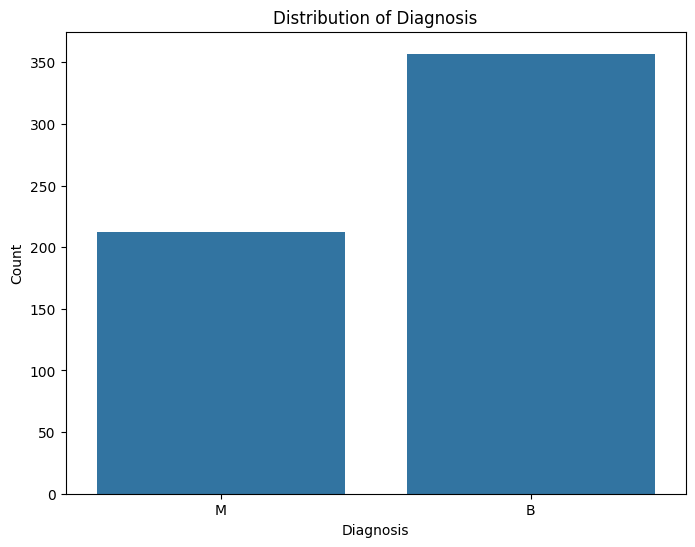


Baseline accuracy (predicting the majority class 'B'): 62.74%


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of the 'diagnosis' column
diagnosis_counts = df['diagnosis'].value_counts()
print(f"Distribution of 'diagnosis' column:\n{diagnosis_counts}")

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Calculate baseline accuracy
majority_class = diagnosis_counts.index[0]
majority_class_count = diagnosis_counts.iloc[0]
total_count = len(df)
baseline_accuracy = (majority_class_count / total_count) * 100
print(f"\nBaseline accuracy (predicting the majority class '{majority_class}'): {baseline_accuracy:.2f}%")

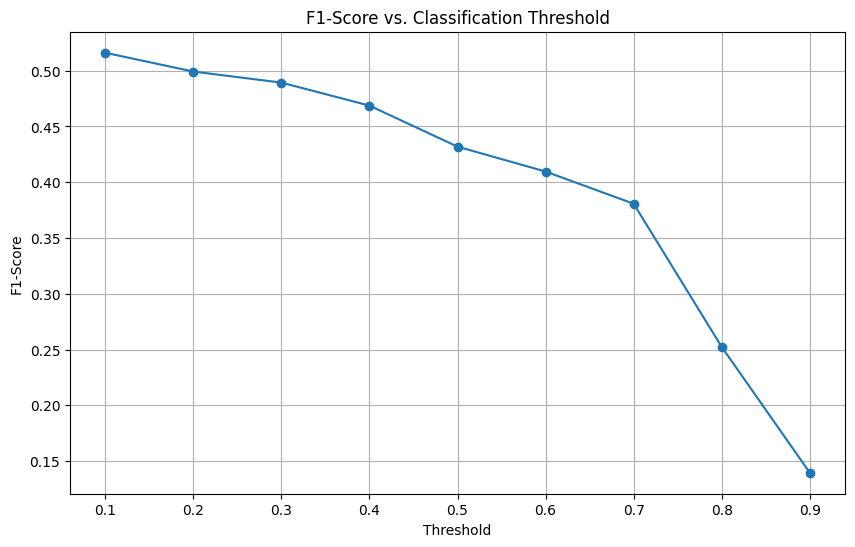

In [5]:
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# 1. Create a hypothetical probability column
df['predicted_probability'] = np.random.rand(len(df))

# 2. Choose evaluation metric: F1-score
# Justification: F1-score balances precision and recall, crucial for imbalanced datasets like this one where we want to correctly identify both benign and malignant tumors.

# 3. & 4. Iterate through thresholds and calculate F1-score
thresholds = np.arange(0.1, 1.0, 0.1)
f1_scores = []
for threshold in thresholds:
    predicted_labels = (df['predicted_probability'] > threshold).astype(int)
    # Assuming 'diagnosis' is coded as 'M' (malignant) and 'B' (benign)
    # Convert 'diagnosis' to numerical labels for f1_score
    true_labels = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
    f1 = f1_score(true_labels, predicted_labels)
    f1_scores.append(f1)

# 5. Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-')
plt.title('F1-Score vs. Classification Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.grid(True)
plt.show()

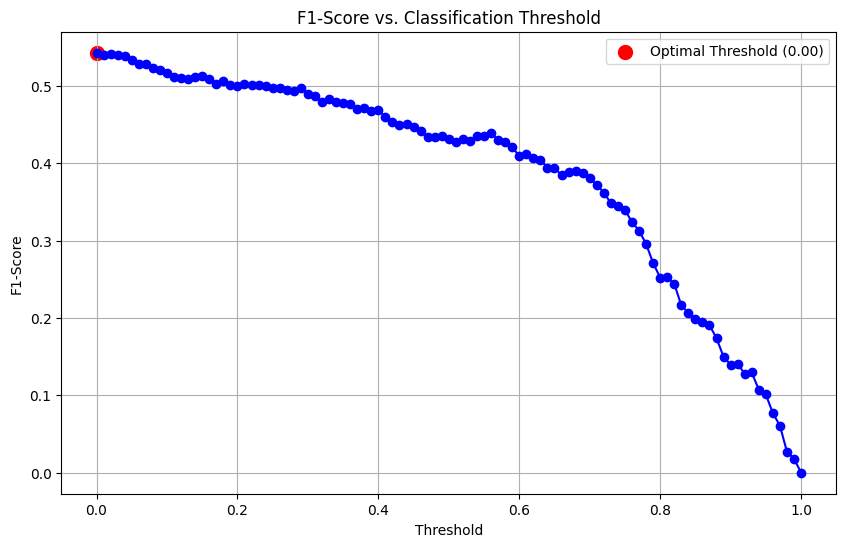

Optimal Threshold: 0.00
Corresponding F1-Score: 0.5429


In [6]:
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Convert 'diagnosis' to numerical labels
true_labels = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

# Iterate through a finer range of thresholds
thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []
for threshold in thresholds:
    predicted_labels = (df['predicted_probability'] > threshold).astype(int)
    f1 = f1_score(true_labels, predicted_labels)
    f1_scores.append(f1)

# Find the optimal threshold
optimal_threshold = thresholds[np.argmax(f1_scores)]
optimal_f1_score = np.max(f1_scores)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-', color='blue')
plt.scatter(optimal_threshold, optimal_f1_score, color='red', s=100, label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.title('F1-Score vs. Classification Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.grid(True)
plt.legend()
plt.show()

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Corresponding F1-Score: {optimal_f1_score:.4f}")